**Importeren van benodigde libraries & het imporeren van de eerste dataset**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn

dataframeGB = pd.read_csv("../initialdata/GBvideos.csv")

In [3]:
dataframeGB

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...
38912,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...
38913,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...
38914,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...


<br><br>
**Tags in de beschrijving**<br><br>
YouTube maakt gebruik van tags. Volgens Google help, gemaakt door hetzelfde moederbedrijf als YouTube, hebben tags de volgende functie:

_"Tags are descriptive keywords you can add to your video to help people find your content."_
<br><br>
Een tag zorgt er dus voor dat een video makkelijker te vinden is. 
<br>
Hierdoor kan de hypothese worden gesteld dat er een verband is tussen het vinden van een video (het aantal views) en de tags in de beschrijving.<br> Deze hypothese zal in dit onderdeel worden onderzocht.<br><br>
Het onderzoeken van de tags zal gebeuren aan de hand van deelvragen:
* Hoeveel tags worden er gebruikt per video?
* Welke tags worden het meest gebruikt voor trending videos?
* is er een verband tussen het aantal tags per video en het aantal views van deze video?



Om te beginnen is er wat data preparation nodig. Het is namelijk zo dat de tags in de dataset allemaal achter elkaar staan, en opgeslagen zijn als object, en dit object eruit ziet als een hele lange lijst met tekst gescheiden door het "**|**" teken. Dit is hieronder te zien.

In [4]:
print("Het datatype van tags is: {0}. \nEen {0} in dit dataframe ziet er als volgt uit:\n\n{1}".format(dataframeGB.tags.dtype, dataframeGB["tags"][0]))

Het datatype van tags is: object. 
Een object in dit dataframe ziet er als volgt uit:

christmas|"john lewis christmas"|"john lewis"|"christmas ad"|"mozthemonster"|"christmas 2017"|"christmas ad 2017"|"john lewis christmas advert"|"moz"


Het werken met deze data is lastig, om deze reden zal er wat data preparatie moeten worden gedaan. Deze preparatie wordt uitgevoerd met de volgende stappen:
- De tags datatypes omzetten van objecten naar string
- De string tags scheiden op basis van het "**|**" teken
- Het verwijderen van de aanhalingstekens die sommige tags bevatten
- Het zetten van [None] tags naar lege cellen zodat ze tellen als 0
- Het verwijderen van videos die al in trending zijn geweest

_Het is belangrijk om te bedenken dat sommige videos meerdere keren kunnen voorkomen in dit dataframe. Dit gebeurt wanneer een video meerdere keren in trending is gekomen. Er is bij het analyseren van de tags gekozen om deze dubbele resultaten uit de dataframe te verwijderen, aangezien de tags bij deze videos hetzelfde blijven, en er is gekozen om deze dataset vanuit het oogpunt van iemand die in trending wil komen is bekeken, en hierbij niet de pre willen meenemen dat deze persoon al eerder dezelfde video in trending heeft gehad._<br><br>

Hieronder wordt er een nieuw dataframe gemaakt met title en tags. De videos die al in de dataset staan worden worden verwijdrd, zodat een video maar een keer voorkomt.

In [64]:
dataframeGB = dataframeGB.drop_duplicates(subset = 'video_id', keep= 'first') #drops records with duplicates in the video_id column
dataframeGB["tags"] = dataframeGB["tags"].replace("[none]", "")
df = pd.DataFrame({"title" : dataframeGB["title"], "tags" : dataframeGB["tags"].str.split("|")}) 
df

,title,tags
0,John Lewis Christmas Ad 2017 - #MozTheMonster,"[christmas, ""john lewis christmas"", ""john lewi..."
1,Taylor Swift: …Ready for It? (Live) - SNL,"[SNL, ""Saturday Night Live"", ""SNL Season 43"", ..."
2,Eminem - Walk On Water (Audio) ft. Beyoncé,"[Eminem, ""Walk"", ""On"", ""Water"", ""Aftermath/Sha..."
3,Goals from Salford City vs Class of 92 and Fri...,"[Salford City FC, ""Salford City"", ""Salford"", ""..."
4,Dashcam captures truck's near miss with child ...,[]
...,...,...
38763,Conway: People are bending to the will of Pres...,"[Fox News Channel, ""FNC"", ""Fox News"", ""News"", ..."
38767,Семён Слепаков: Олé-Олé-Олé!,"[Семен Слепаков, ""гитара"", ""бард-десятник"", ""C..."
38782,Live It Up (Official Video) - Nicky Jam feat. ...,"[Nicky Jam, ""NickyJamPR"", ""latin"", ""will smith..."
38793,The Chainsmokers - Somebody ft. Drew Love (Ror...,"[The Chainsmokers Somebody, ""Chainsmokers Some..."


<br>**Hoeveelheid tags**<br><br>In dit onderdeel gaat er worden uitgezocht hoeveel tags er worden gebruikt voor trending videos. Dit gaat gebeuren door te kijken naar:
* Het gemiddelde aantal tags per video
* De maximum hoeveelheid tags per video
* De normaalverdeling van de hoeveelheid tags per video<br><br>
Hieronder is het gemiddeld aantal tags per video te zien en de maximale hoeveelheid tags.

In [65]:
tagCount = [len(x) for x in df.tags] #list comprehension to create a list with tags per video
dataFrameTagCount = pd.DataFrame({"title" : dataframeGB["title"],"views" : dataframeGB["views"] ,"tags" : dataframeGB["tags"].str.split("|"), "tagCount" : tagCount})

mostTags = dataFrameTagCount.sort_values(by=["tagCount", "title"], ascending = False) #video with most tags
print("Uit de onderstaande dataframe is te halen dat een video in trending gemiddeld afgerond {0} tags heeft.\n De video {1} heeft de meeste tags, namelijk {2}".format(round(dataFrameTagCount.tagCount.mean()), mostTags.title.head(1).to_string(index = False), mostTags.tagCount.head(1).to_string(index=False)))
dataFrameTagCount

Uit de onderstaande dataframe is te halen dat een video in trending gemiddeld afgerond 19 tags heeft.
 De video  부부싸움중인 강아지들 (사람이랑 완전 똑같음ㅋㅋㅋ) heeft de meeste tags, namelijk  78


,title,views,tags,tagCount
0,John Lewis Christmas Ad 2017 - #MozTheMonster,7224515,"[christmas, ""john lewis christmas"", ""john lewi...",9
1,Taylor Swift: …Ready for It? (Live) - SNL,1053632,"[SNL, ""Saturday Night Live"", ""SNL Season 43"", ...",36
2,Eminem - Walk On Water (Audio) ft. Beyoncé,17158579,"[Eminem, ""Walk"", ""On"", ""Water"", ""Aftermath/Sha...",6
3,Goals from Salford City vs Class of 92 and Fri...,27833,"[Salford City FC, ""Salford City"", ""Salford"", ""...",9
4,Dashcam captures truck's near miss with child ...,9815,[],1
...,...,...,...,...
38763,Conway: People are bending to the will of Pres...,99048,"[Fox News Channel, ""FNC"", ""Fox News"", ""News"", ...",21
38767,Семён Слепаков: Олé-Олé-Олé!,6597033,"[Семен Слепаков, ""гитара"", ""бард-десятник"", ""C...",15
38782,Live It Up (Official Video) - Nicky Jam feat. ...,20409647,"[Nicky Jam, ""NickyJamPR"", ""latin"", ""will smith...",33
38793,The Chainsmokers - Somebody ft. Drew Love (Ror...,402345,"[The Chainsmokers Somebody, ""Chainsmokers Some...",17


# visualisatie


In dit onderdeel zal de data van tags gevisualiseerd worden. Dit gaat gebeuren met de hand van de twee onderstaande grafieken.<br><br><br>
**Grafiek 1**
<br>grafiek 1 is de verdeling van de hoeveelheid tags die gebruikt wordt per trending video.<br>Zoals te zien is er *geen* perfecte normaalverdeling in deze grafiek.<br>Wel is er te zien dat, ondanks een gemiddelde van 19 tags per video, de meest gebruikte hoeveelheid tags rond de 10 ligt. 

sn.distplot(tagCount, axlabel="Hoeveelheid tags per video")


**Grafiek 2**<br>In deze grafiek zijn de 20 meest gebruikte tags per video te zien.<br>Hierbij is te concluderen dat "Funny" het vaakst voorkomt als tag in trending.<br>Er is overigens gekozen om de videos waar *geen* tags worden gebruikt te labelen als 'No  tags used" 


De tag "funny" wordt het meest gebruikt bij trending videos. Wanneer je deze getallen omzet naar percentages, is er te concluderen dat "funny" wordt gebruikt in 318 / 60972 videos.


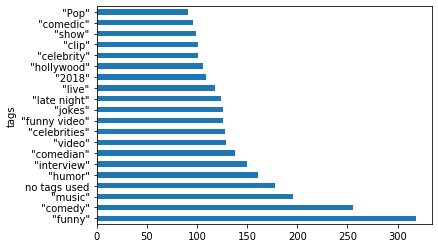

In [143]:
tagsDataframe = df.explode("tags") #per tag wordt er een nieuwe record aangemaakt met de video ID erbij 
tagsDataframe
tagsDataframe["tags"] = tagsDataframe["tags"].replace("", "no tags used")
mostUsedDataframe = tagsDataframe.groupby("tags").size().sort_values(ascending = False).head(20) #Top 20 most used tags
mostUsedDataframe.plot.barh()
print("\nDe tag {2} wordt het meest gebruikt bij trending videos. Wanneer je deze getallen omzet naar percentages, is er te concluderen dat {2} wordt gebruikt in {1} / {0} videos.".format(sum(dataFrameTagCount["tagCount"]), mostUsedDataframe[0], mostUsedDataframe.keys()[0]))


Nu de meest gebruikte tags, het gemiddelde aantal tags per video en de meeste aantal tags per video bekend zijn, is er nog een belangrijke vraag over, namelijk: is er een verband tussen het aantal tags en de views op een video. Dit gaat hieronder worden onderzocht.<br><br> De eerste stap die hierin gemaakt is, is het uitzoeken welke videos de meeste kijkers hebben.

In [95]:
viewPerTagDataframe= dataFrameTagCount.copy()
mostViewedDataframe = viewPerTagDataframe.sort_values("views", ascending = False).head(20)

mutualTags = [x for x in mostViewedDataframe if x in mostUsedDataframe]
print(mutualTags)

#no results => most used tags don't correspond with most succesful video in trending

[]


In [102]:
print("De top 20 meest bekeken videos hebben gemiddeld {} tags per video".format(mostViewedDataframe["tagCount"].mean()))
mostViewedDataframe

De top 20 meest bekeken videos hebben gemiddeld 17.35 tags per video


,title,views,tags,tagCount
3587,"Luis Fonsi, Demi Lovato - Échame La Culpa",143408235,"[Luis, ""Fonsi"", ""Demi"", ""Lovato"", ""Échame"", ""L...",11
32412,"Becky G, Natti Natasha - Sin Pijama (Official ...",88568646,"[Becky G, ""Natti Natasha"", ""Natti Natasha Musi...",22
28479,"Sebastián Yatra - Por Perro ft. Luis Figueroa,...",47669287,"[Sebastián, ""Yatra"", ""Por"", ""Perro"", ""Andres"",...",8
31702,Ozuna - Única (Video Oficial) 🐻 A U R A,42923278,"[Ozuna, ""Reggaeton"", ""Odisea"", ""Odisea The Alb...",6
34463,BTS (방탄소년단) 'FAKE LOVE' Official MV,39349927,"[BIGHIT, ""빅히트"", ""방탄소년단"", ""BTS"", ""BANGTAN"", ""방탄""]",6
19664,Rkm & Ken-Y ❌ Natti Natasha - Tonta [Official ...,39118664,"[pina records, ""Natti Natasha"", ""rkm y ken y"",...",30
28458,TWICE What is Love? M/V,38873543,"[TWICE What is Love, ""TWICE What is Love?"", ""T...",35
3198,Marvel Studios' Avengers: Infinity War Officia...,37736281,"[marvel, ""comics"", ""comic books"", ""nerdy"", ""ge...",11
19593,Drake - God’s Plan,33591858,"[Drake new music, ""Drake Gods Plan"", ""Drake Go...",6
6,Ed Sheeran - Perfect (Official Music Video),33523622,"[edsheeran, ""ed sheeran"", ""acoustic"", ""live"", ...",10


### Discussie
- Met de dataset is het niet mogelijk geweest om te bekijken hoe belangrijk tags zijn om in tending te komen, aangezien er geen data is voor non-trending videos.
- In dit onderzoek zijn videos die meerdere malen voorkwamen in de trending database weggelaten.
- Er is bij het kijken naar de meest gebruikte tags niet gekeken naar de categorie waar de tags zijn gebruikt. Het kan dus zijn dat bepaalde tags vaker voorkomen bij een bepaalde categorie videos.

### Conclusie
Als korte samenvatting zijn er in deze conclusie een paar van de bevindingen onder elkaar gezet. <br>Er is gekozen om dit als een print te doen, omdat de variabelen hierdoor niet hard-coded in dit jupyter notebook hoeven te staan. Voer daarom de onderstaande code uit voor een conclusie!


In [155]:
print("""
* Met de huidige dataset is het niet mogelijk om te bepalen hoe essentieel tags zijn om een video in de youtube-trending lijst te krijgen,\n aangezien de gebruikte dataset alleen videos heeft opgenomen die wel in de trending pagina terecht zijn gekomen
\n* De top 3 tags die gebruikt zijn onder trending videos zijn: {0}, {1} en {2}
\n* Een trending video gebruikt gemiddeld {3} tags, de video met de meeste tags had {4} tags
\n* Wanneer er gekeken werd naar de top 20 meest bekeken videos in trending, was het opmerkelijk dat geen van deze videos een van de meest gebruikte tags bevatte
\n* Naast dit feit, viel het ook op dat het gemiddeld aantal tags voor de videos in de top 20 meest bekeken videos in trending lager ligt dan het gemiddelde van alle trending videos, namelijk {5} in vergelijking met {3}.
""".format(mostUsedDataframe.keys()[0],mostUsedDataframe.keys()[1],mostUsedDataframe.keys()[2],round(dataFrameTagCount.tagCount.mean()),mostTags.tagCount.head(1).to_string(index=False) , round(mostViewedDataframe["tagCount"].mean())))


* Met de huidige dataset is het niet mogelijk om te bepalen hoe essentieel tags zijn om een video in de youtube-trending lijst te krijgen,
 aangezien de gebruikte dataset alleen videos heeft opgenomen die wel in de trending pagina terecht zijn gekomen

* De top 3 tags die gebruikt zijn onder trending videos zijn: "funny", "comedy" en "music"

* Een trending video gebruikt gemiddeld 19 tags, de video met de meeste tags had  78 tags

* Wanneer er gekeken werd naar de top 20 meest bekeken videos in trending, was het opmerkelijk dat geen van deze videos een van de meest gebruikte tags bevatte

* Naast dit feit, viel het ook op dat het gemiddeld aantal tags voor de videos in de top 20 meest bekeken videos in trending lager ligt dan het gemiddelde van alle trending videos, namelijk 17 in vergelijking met 19.

